In [11]:
# import libraries
import os
from os.path import dirname, realpath
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_dim_ordering('th')

In [12]:
PLOTS_DIR = os.path.join("CNN", "plots")
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

In [13]:
def Get_Data():
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)

    # load data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # reshape to be [samples][pixels][width][height]
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

    # normalize inputs from 0-255 to 0-1
    x_train = x_train / 255
    x_test = x_test / 255

    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    return x_train, y_train, x_test, y_test

In [14]:
def Build_baseline_Model(activation_fn = "relu",optimizer_name = "adam", layers=1,add_Dropout_layer=True, Dropout_value = 0.2, 
                        kernel_size=(5, 5), no_of_kernels=32, add_dense_layer=True,dense_layer = 1):
    num_classes = 10
    
    model = Sequential()
    model.add(Conv2D(no_of_kernels, kernel_size = kernel_size, input_shape=(1, 28, 28), activation=activation_fn))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    if layers == 2:
        model.add(Conv2D(64, kernel_size = kernel_size, input_shape=(1, 28, 28), activation=activation_fn))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    if add_Dropout_layer == True:
        model.add(Dropout(Dropout_value))
        
    model.add(Flatten())
    
    if add_dense_layer == True:
        model.add(Dense(128, activation=activation_fn))
        
        if add_Dropout_layer == True:
            model.add(Dropout(Dropout_value))
    
    if dense_layer == 2 and add_dense_layer == True:
        model.add(Dense(50, activation=activation_fn))
        
        if add_Dropout_layer == True:
            model.add(Dropout(Dropout_value))
        
    
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
     
    return model
        

In [30]:
def change_no_kernel(x_train, y_train, x_test, y_test, batch_size = 200, no_of_epochs = 10):
    # build the model
    model1 = Build_baseline_Model(no_of_kernels=10)
    model2 = Build_baseline_Model(no_of_kernels = 20)
    model3 = Build_baseline_Model(no_of_kernels = 32)
    
    # Fit the model
    history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=no_of_epochs, batch_size=batch_size, verbose=2)
    history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=no_of_epochs, batch_size=batch_size, verbose=2)
    history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=no_of_epochs, batch_size=batch_size, verbose=2)
    
    # Final evaluation of the model
    score1 = model1.evaluate(x_test, y_test, verbose=0)
    score2 = model2.evaluate(x_test, y_test, verbose=0)
    score3 = model3.evaluate(x_test, y_test, verbose=0)
    
    plt.plot(history1.history['val_acc'])
    plt.plot(history2.history['val_acc'])
    plt.plot(history3.history['val_acc'])
    plt.title('Model accuracy based on no. of kernels')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    legend1 = ' no_of_kernel = 10(Test accuracy - {})'.format(score1[1])
    legend2 = 'no_of_kernel = 20(Test accuracy - {})'.format(score2[1])
    legend3 = 'no_of_kernel = 32(Test accuracy - {})'.format(score3[1])
    plt.legend([legend1, legend2, legend3], loc='lower right')
    #plt.show()
    plt.savefig(PLOTS_DIR + '/acc_CNN_{}.png'.format(plot_type))
    plt.close()
    
    print("CNN Error of Model 1: %.2f%%" % (100-score1[1]*100))
    print("CNN Error of Model 2: %.2f%%" % (100-score2[1]*100))
    print("CNN Error of Model 3: %.2f%%" % (100-score3[1]*100))

In [16]:
def change_layers(X_train, y_train, X_test, y_test, batch_size = 200, no_of_epochs = 10):
    plot_type='layers'
    model1 = Build_baseline_Model(layers = 1, add_dense_layer=False)
    model2 = Build_baseline_Model(layers = 1)
    model3 = Build_baseline_Model(layers = 2)
    
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    score3 = model3.evaluate(X_test, y_test, verbose=0)
    
    plt.plot(history1.history['val_acc'])
    plt.plot(history2.history['val_acc'])
    plt.plot(history3.history['val_acc'])
    plt.title('Model accuracy based on no. of hidden layers')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    legend1 = '1 Convolution layer(Test accuracy - {})'.format(score1[1])
    legend2 = '1 Convolution layer, 1 dense layer(Test accuracy - {})'.format(score2[1])
    legend3 = '2 Convolution layers, 1 dense layer(Test accuracy - {})'.format(score3[1])
    plt.legend([legend1, legend2, legend3], loc='lower right')
    plt.savefig(PLOTS_DIR + '/acc_CNN_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [17]:
def change_Activation_fn(X_train, y_train, X_test, y_test, batch_size = 200, no_of_epochs = 10):
    plot_type='activation'
    model1 = Build_baseline_Model(activation_fn= "relu")
    model2 = Build_baseline_Model(activation_fn= "tanh")
    model3 = Build_baseline_Model(activation_fn= "sigmoid")
    
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    score3 = model3.evaluate(X_test, y_test, verbose=0)
    
    plt.plot(history1.history['val_acc'])
    plt.plot(history2.history['val_acc'])
    plt.plot(history3.history['val_acc'])
    plt.title('Model accuracy based on no. of Activation function')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    legend1 = 'Relu(Test accuracy - {})'.format(score1[1])
    legend2 = 'Tanh(Test accuracy - {})'.format(score2[1])
    legend3 = 'Sigmoid(Test accuracy - {})'.format(score3[1])
    plt.legend([legend1, legend2, legend3], loc='lower right')
    plt.savefig(PLOTS_DIR + '/acc_CNN_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [25]:
def change_kernel_size(X_train, y_train, X_test, y_test, batch_size = 200, no_of_epochs = 10):
    plot_type='kernel_size'
    model1 = Build_baseline_Model(kernel_size=(3, 3))
    model2 = Build_baseline_Model(kernel_size=(5, 5))
    model3 = Build_baseline_Model(kernel_size=(15, 15))
    
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    score3 = model3.evaluate(X_test, y_test, verbose=0)

    plt.plot(history1.history['val_acc'])
    plt.plot(history2.history['val_acc'])
    plt.plot(history3.history['val_acc'])
    plt.title('Model accuracy based on kernel size')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    legend1 = '3x3 kernel(Test accuracy - {})'.format(score1[1])
    legend2 = '5x5 kernel(Test accuracy - {})'.format(score2[1])
    legend3 = '15x15 kernel(Test accuracy - {})'.format(score3[1])
    plt.legend([legend1, legend2, legend3], loc='lower right')
    plt.savefig(PLOTS_DIR + '/acc_CNN_{}.png'.format(plot_type))
    plt.close()

In [23]:
def change_overfitting(X_train, y_train, X_test, y_test, batch_size = 200, no_of_epochs = 10):
    plot_type='overfitting'
    model1 = Build_baseline_Model()
    model2 = Build_baseline_Model(add_Dropout_layer = True)
    
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=no_of_epochs, verbose=2)
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)

    plt.plot(history1.history['acc'])
    plt.plot(history1.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    #plt.show()
    plt.savefig(PLOTS_DIR + '/acc_CNN_test_train.png'.format(plot_type))
    plt.close()

    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    #plt.show()
    plt.savefig(PLOTS_DIR + '/loss_CNN_test_train.png'.format(plot_type))
    plt.close()

    plt.plot(history1.history['val_loss'])
    plt.plot(history2.history['val_loss'])
    plt.title('Model loss using different overfitting techniques')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    legend1 = 'No technique used(Test accuracy - {})'.format(score1[1])
    legend2 = 'Dropout(Test accuracy - {})'.format(score2[1])
    plt.legend([legend1, legend2], loc='upper right')
    #plt.show()
    plt.savefig(PLOTS_DIR + '/loss_CNN_{}.png'.format(plot_type))
    plt.close()

W0821 19:32:42.081018 140367298840384 deprecation_wrapper.py:119] From /home/kevin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 19:32:42.096486 140367298840384 deprecation_wrapper.py:119] From /home/kevin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 19:32:42.099565 140367298840384 deprecation_wrapper.py:119] From /home/kevin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 19:32:42.119054 140367298840384 deprecation_wrapper.py:119] From /home/kevin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_s

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 16s - loss: 0.3944 - acc: 0.8844 - val_loss: 0.1239 - val_acc: 0.9639
Epoch 2/5
 - 13s - loss: 0.1337 - acc: 0.9595 - val_loss: 0.0730 - val_acc: 0.9779
Epoch 3/5
 - 13s - loss: 0.0957 - acc: 0.9713 - val_loss: 0.0562 - val_acc: 0.9822
Epoch 4/5
 - 13s - loss: 0.0765 - acc: 0.9762 - val_loss: 0.0506 - val_acc: 0.9833
Epoch 5/5
 - 14s - loss: 0.0664 - acc: 0.9795 - val_loss: 0.0418 - val_acc: 0.9855
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 23s - loss: 0.2792 - acc: 0.9205 - val_loss: 0.0848 - val_acc: 0.9748
Epoch 2/5
 - 20s - loss: 0.0920 - acc: 0.9726 - val_loss: 0.0507 - val_acc: 0.9840
Epoch 3/5
 - 20s - loss: 0.0651 - acc: 0.9802 - val_loss: 0.0390 - val_acc: 0.9871
Epoch 4/5
 - 22s - loss: 0.0531 - acc: 0.9835 - val_loss: 0.0356 - val_acc: 0.9883
Epoch 5/5
 - 20s - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0325 - val_acc: 0.9890
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 32s - l

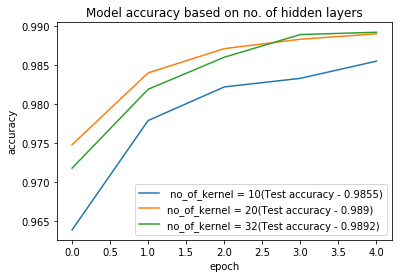

NameError: name 'plot_type' is not defined

In [20]:
if __name__ == '__main__':
    x_train, y_train, x_test, y_test = Get_Data()
    change_no_kernel(x_train,y_train,x_test,y_test,no_of_epochs=5)
    change_layers(x_train,y_train,x_test,y_test,no_of_epochs=5)
    #change_Activation_fn(x_train,y_train,x_test,y_test,no_of_epochs=5)
    change_kernel_size(x_train,y_train,x_test,y_test,no_of_epochs=5)    
    #change_overfitting(x_train, y_train, x_test,y_test, no_of_epochs = 5)
    pass

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 20s - loss: 0.3610 - acc: 0.8934 - val_loss: 0.1003 - val_acc: 0.9701
Epoch 2/5
 - 13s - loss: 0.1155 - acc: 0.9653 - val_loss: 0.0611 - val_acc: 0.9812
Epoch 3/5
 - 13s - loss: 0.0833 - acc: 0.9746 - val_loss: 0.0511 - val_acc: 0.9838
Epoch 4/5
 - 13s - loss: 0.0688 - acc: 0.9792 - val_loss: 0.0443 - val_acc: 0.9850
Epoch 5/5
 - 13s - loss: 0.0596 - acc: 0.9814 - val_loss: 0.0398 - val_acc: 0.9869
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 24s - loss: 0.3202 - acc: 0.9062 - val_loss: 0.1011 - val_acc: 0.9708
Epoch 2/5
 - 22s - loss: 0.1067 - acc: 0.9687 - val_loss: 0.0653 - val_acc: 0.9787
Epoch 3/5
 - 24s - loss: 0.0756 - acc: 0.9770 - val_loss: 0.0469 - val_acc: 0.9856
Epoch 4/5
 - 22s - loss: 0.0598 - acc: 0.9815 - val_loss: 0.0418 - val_acc: 0.9869
Epoch 5/5
 - 20s - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0382 - val_acc: 0.9883
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 37s - l

NameError: name 'plot_type' is not defined

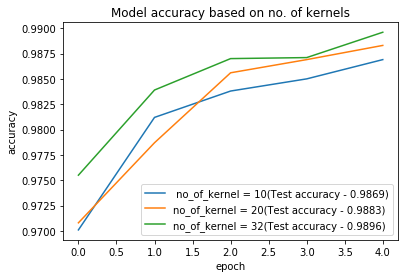

In [31]:
    change_no_kernel(x_train,y_train,x_test,y_test,no_of_epochs=5)


In [26]:
    change_kernel_size(x_train,y_train,x_test,y_test,no_of_epochs=5)    


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 34s - loss: 0.3211 - acc: 0.9085 - val_loss: 0.1042 - val_acc: 0.9689
Epoch 2/5
 - 42s - loss: 0.1022 - acc: 0.9696 - val_loss: 0.0641 - val_acc: 0.9804
Epoch 3/5
 - 50s - loss: 0.0708 - acc: 0.9784 - val_loss: 0.0498 - val_acc: 0.9830
Epoch 4/5
 - 47s - loss: 0.0572 - acc: 0.9821 - val_loss: 0.0436 - val_acc: 0.9844
Epoch 5/5
 - 45s - loss: 0.0472 - acc: 0.9856 - val_loss: 0.0429 - val_acc: 0.9852
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 35s - loss: 0.2876 - acc: 0.9165 - val_loss: 0.0788 - val_acc: 0.9765
Epoch 2/5
 - 32s - loss: 0.0873 - acc: 0.9742 - val_loss: 0.0557 - val_acc: 0.9812
Epoch 3/5
 - 41s - loss: 0.0615 - acc: 0.9817 - val_loss: 0.0387 - val_acc: 0.9864
Epoch 4/5
 - 70s - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0358 - val_acc: 0.9891
Epoch 5/5
 - 44s - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0329 - val_acc: 0.9885
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 14s - l